## Give Me The Next AAA Title
# Highest Rated Movies (2011 - present)
****

<br>
by Dustin Reyes
<br>
<br>
Prepared for:
<br>
Mynt (Globe Fintech Innovations, Inc.)
<br>
<br>

In [1]:
import imdb
import pickle
import numpy as np
import pandas as pd
import warnings
import datetime as dt
from tqdm import tqdm
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from random import randint
from time import sleep
from pytrends.request import TrendReq
import ipywidgets as widgets
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')
tqdm.pandas()
%matplotlib inline

In [2]:
cols = ['tconst', 'title', 'release', 'startYear', 'director', 'budget', 'opening', 'gross',
       'worldwide_gross', 'metacritic_score', 'mpaa_rating', 'budget_mil',
       'opening_mil', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes']
df_movies = pd.read_csv('data/titles_complete_info.csv', usecols = cols)
df_movies.head()

,title,release,director,budget,opening,gross,worldwide_gross,metacritic_score,mpaa_rating,budget_mil,opening_mil,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Jurassic World,2015-06-12,Colin Trevorrow,150000000,208806270,652385625,1.670516e+09,59.0,PG-13,150.0,208.806270,tt0369610,2015,124,Action,7.0,584990
1,Motherless Brooklyn,2019-11-01,Edward Norton,26000000,3500454,9277736,1.847774e+07,60.0,R,26.0,3.500454,tt0385887,2019,144,Crime,6.8,46090
2,Alita: Battle Angel,2019-02-14,Robert Rodriguez,170000000,28525613,85838210,4.049805e+08,53.0,PG-13,170.0,28.525613,tt0437086,2019,122,Action,7.3,234341
3,Shazam!,2019-04-05,David F. Sandberg,100000000,53505326,140371656,3.659717e+08,71.0,PG-13,100.0,53.505326,tt0448115,2019,132,Action,7.0,269073
4,Wonder Woman,2017-06-02,Patty Jenkins,149000000,103251471,412815408,8.228245e+08,76.0,PG-13,149.0,103.251471,tt0451279,2017,141,Action,7.4,587725


In [3]:
df_movies.dropna(subset = ['worldwide_gross', 'metacritic_score'], inplace = True)
df_movies.reset_index(drop = True, inplace = True)

In [4]:
df_movies.columns

Index(['title', 'release', 'director', 'budget', 'opening', 'gross',
       'worldwide_gross', 'metacritic_score', 'mpaa_rating', 'budget_mil',
       'opening_mil', 'tconst', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes'],
      dtype='object')

In [5]:
df_movies.sort_values(by = 'release', inplace = True)
df_movies.reset_index(drop = True, inplace = True)

In [6]:
df_movies.head()

,title,release,director,budget,opening,gross,worldwide_gross,metacritic_score,mpaa_rating,budget_mil,opening_mil,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Season of the Witch,2011-01-07,Dominic Sena,40000000,10612375,24827228,91627228.0,28.0,PG-13,40.0,10.612375,tt0479997,2011,95,Action,5.4,90902
1,The Green Hornet,2011-01-14,Michel Gondry,120000000,33526876,98780042,227817248.0,39.0,PG-13,120.0,33.526876,tt0990407,2011,119,Action,5.8,155886
2,The Rite,2011-01-28,Mikael Håfström,37000000,14789393,33047633,96560591.0,38.0,PG-13,37.0,14.789393,tt1161864,2011,114,Drama,6.0,91850
3,The Mechanic,2011-01-28,Simon West,40000000,11422006,29121498,76130093.0,49.0,R,40.0,11.422006,tt0472399,2011,93,Action,6.6,152076
4,Sanctum,2011-02-04,Alister Grierson,30000000,9447930,23209310,108609310.0,42.0,R,30.0,9.447930,tt0881320,2011,108,Action,5.9,53868


In [7]:
df_movies.rename({'worldwide_gross': 'Worldwide Gross', 'metacritic_score': 'Metacritic Score',
                  'budget': 'Budget', 'opening': 'Opening', 
                  'gross': 'Gross', 
                  'runtimeMinutes': 'Runtime (Minutes)',
                  'averageRating': 'Average Rating', 'numVotes': 'Number of Votes'},
                axis = 1, inplace = True)

## 1. Movie Rankings per Year

In [8]:
def movie_analyzer(category='Metacritic Score', year=2011):
    df_movies_sorted = df_movies.groupby(['startYear']).apply(
        lambda x: x.nlargest(10, [category])).reset_index(drop=True)
    df_movies_sorted = df_movies_sorted[df_movies_sorted['startYear'] == year]
    df_movies_sorted = df_movies_sorted.sort_values(category, ascending=True)
    fig = go.Figure(go.Bar(
        x=df_movies_sorted[category],
        y=df_movies_sorted['title'],
        orientation='h'))

    fig.update_layout(title_text=f"Movie Rankings by: {category}",



                      title_x=0.5, xaxis={
                          'categoryorder': 'total ascending'},
                      xaxis_title=category,
                      yaxis_title='Movies')
    fig.show()

In [9]:
years = []
categories = ['Budget', 'Opening', 'Gross',
              'Worldwide Gross', 'Metacritic Score', 'Runtime (Minutes)', 'Average Rating', 'Number of Votes']


for i in df_movies['startYear'].unique():
    years.append(i)

In [10]:
interactive1 = interact(movie_analyzer, category = categories, year = years)

interactive(children=(Dropdown(description='category', index=4, options=('Budget', 'Opening', 'Gross', 'Worldw…

## 2. Runtimes of Movies per Genre

In [11]:
# Helper Functions
def clean_year(y):
    # Return year as an integer or 'NaN' if empty
    import numpy as np
    try:
        return int(y)
    except:
        return np.nan


def clean_genre(y):
    # Return only the first genre listed
    y = str(y)
    if y == '\\N':
        return ''
    return y.split(',')[0].strip()

In [12]:
title_basics_df = pd.read_csv('data/title.basics.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"')

In [13]:
title_basics_df = title_basics_df[title_basics_df['startYear'] != '\\N']
title_basics_df = title_basics_df[title_basics_df['runtimeMinutes'] != '\\N']
title_basics_df['titleType'] = title_basics_df['titleType'].astype(str)
title_basics_df['isAdult'] = title_basics_df['isAdult'].astype(int)
title_basics_df['runtimeMinutes'] = title_basics_df['runtimeMinutes'].astype(
    int)
title_basics_df['startYear'] = title_basics_df['startYear'].astype(int)

In [14]:
title_basics_df.drop('endYear', axis=1, inplace=True)
title_basics_df['startYear'] = title_basics_df['startYear'].apply(clean_year)
title_basics_df['runtimeMinutes'] = title_basics_df['runtimeMinutes'].apply(clean_year)
title_basics_df['genres'] = title_basics_df['genres'].apply(clean_genre)
title_basics_df.dropna(inplace=True, how='any', subset=['startYear', 'runtimeMinutes'])

In [15]:
title_basics_df = title_basics_df[title_basics_df['titleType'] == 'movie']

In [16]:
title_basics_df = title_basics_df.replace(r'^\s*$', np.nan, regex=True)

In [17]:
title_basics_df.dropna(inplace = True)

In [18]:
title_basics_df.sort_values(by = 'startYear', inplace = True)

In [19]:
title_basics_df.reset_index(drop = True, inplace = True)

In [20]:
genres = title_basics_df['genres'].unique().tolist()
genres.append('All')

In [21]:
def runtimemovie_analyzer(number=10, genre='All'):
    if genre == 'All':
        df = title_basics_df.nlargest(number, 'runtimeMinutes')
        df.sort_values(by='runtimeMinutes', ascending=True, inplace=True)
        fig = go.Figure(go.Bar(
            x=df['runtimeMinutes'],
            y=df['primaryTitle'],
            orientation='h'))

        fig.update_layout(title_text=f"Top {number} Longest Movies with {genre} genres ",

                          title_x=0.5,
                          xaxis_title='Runtime (Minutes)',
                          yaxis_title='Movies')
        fig.show()
    else:
        df = title_basics_df[title_basics_df['genres'] == genre]
        df = df.nlargest(number, 'runtimeMinutes')
        df.sort_values(by='runtimeMinutes', ascending=True, inplace=True)
        fig = go.Figure(go.Bar(
            x=df['runtimeMinutes'],
            y=df['primaryTitle'],
            orientation='h'))

        fig.update_layout(title_text=f"Top {number} Longest Movies with {genre} genre ",
                          autosize=True,
                          title_x=0.5,
                          xaxis_title='Runtime (Minutes)',
                          yaxis_title='Movies')
        fig.show()

In [22]:
interactive2 = interact(runtimemovie_analyzer, number=widgets.IntSlider(min=10, max=20, step=1, value=10), genre = genres)

interactive(children=(IntSlider(value=10, description='number', max=20, min=10), Dropdown(description='genre',…

## 3. Temporal Pattern Analysis

In [23]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
import bokeh.palettes
from bokeh.transform import factor_cmap
from wordcloud import WordCloud, STOPWORDS
from math import floor
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html

%config InlineBackend.figure_format = 'retina'

In [24]:
output_notebook()

Loading BokehJS ...

In [25]:
df_movies.head()

,title,release,director,Budget,Opening,Gross,Worldwide Gross,Metacritic Score,mpaa_rating,budget_mil,opening_mil,tconst,startYear,Runtime (Minutes),genres,Average Rating,Number of Votes
0,Season of the Witch,2011-01-07,Dominic Sena,40000000,10612375,24827228,91627228.0,28.0,PG-13,40.0,10.612375,tt0479997,2011,95,Action,5.4,90902
1,The Green Hornet,2011-01-14,Michel Gondry,120000000,33526876,98780042,227817248.0,39.0,PG-13,120.0,33.526876,tt0990407,2011,119,Action,5.8,155886
2,The Rite,2011-01-28,Mikael Håfström,37000000,14789393,33047633,96560591.0,38.0,PG-13,37.0,14.789393,tt1161864,2011,114,Drama,6.0,91850
3,The Mechanic,2011-01-28,Simon West,40000000,11422006,29121498,76130093.0,49.0,R,40.0,11.422006,tt0472399,2011,93,Action,6.6,152076
4,Sanctum,2011-02-04,Alister Grierson,30000000,9447930,23209310,108609310.0,42.0,R,30.0,9.447930,tt0881320,2011,108,Action,5.9,53868


In [26]:
df_movies['month'] = pd.DatetimeIndex(df_movies['release']).month

In [27]:
opening_by_month_year = df_movies.groupby(["startYear","month"]).Opening.mean().reset_index()

In [28]:
opening_by_month_year

,startYear,month,Opening
0,2011,1,1.233979e+07
1,2011,2,1.362104e+07
2,2011,3,1.053773e+07
3,2011,4,1.811284e+07
4,2011,5,2.335145e+07
...,...,...,...
112,2020,9,9.353090e+06
113,2020,10,9.194300e+04
114,2020,11,3.600355e+06
115,2020,12,2.201269e+06


In [29]:
newdata = ColumnDataSource(opening_by_month_year)

mapper = LinearColorMapper(palette=bokeh.palettes.RdBu[9],
                           low=opening_by_month_year["Opening"].min(), high=opening_by_month_year["Opening"].max())


hover = HoverTool(
    tooltips=[
        ("Opening", "@Opening{$,}"),
    ]
)

TOOLS = [hover, "save,pan,box_zoom,reset,wheel_zoom"]


p = figure(x_axis_label='Year',
           y_axis_label='Month',
           tools=TOOLS,
           plot_width=900)

p.rect(x="startYear", y="month", width=1, height=1, source=newdata,
       fill_color={'field': 'Opening', 'transform': mapper})

color_bar = ColorBar(color_mapper=mapper, location=(20, 0), label_standoff=18,
                     ticker=AdaptiveTicker(), formatter=NumeralTickFormatter(format="$,"))

p.add_layout(color_bar, 'right')

p.title.text = "Movie Opening Performance by Year and Month"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

## 4. Genre Analysis

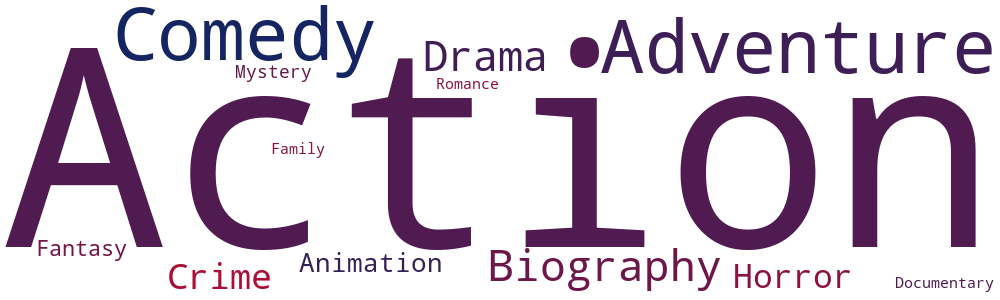

In [30]:
# Join the different processed abstracts together.
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

long_string = ' '.join(df_movies['genres'].values.tolist())

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap=cmap, width=1000,
                        height=300, max_font_size=500,relative_scaling=0.3,
                        min_font_size=5)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Observing from the WordCloud of Genres for movie releases between 2011 to 2021, it can be observed that **Action** is the most common genre that was being shown in cinemas. This means that although ‘Action’ movies are more profitable as of late, it is not solely because these genres have the most amount of movies

### 4.1. Opening Performance for each Genre Across the Years

In [31]:
def genre_opening_analyzer(category = 'Opening'):
    genre_list = ['Action', 'Biography', 'Comedy', 'Drama', 'Adventure', 'Crime', 'Horror', 'Animation']
    grouped_data = df_movies.groupby(['startYear', 'genres'])[category].mean().reset_index()
    fig = go.Figure()
    for i in genre_list:
        fig.add_trace(
            go.Scatter(
                y=grouped_data[grouped_data['genres'] == i][category].values,
                x=grouped_data[grouped_data['genres'] == i]['startYear'].values,
                name=i
            ))
    fig.update_layout(
        autosize=False,
        title= f'{category} Performance for each Genre Across the Years',
        title_x=0.5,
        xaxis_title='Years',
        yaxis_title=f'{category} Performance',
        width=950,
        height=650,
        margin=dict(
            l=0,
            r=0,
            b=100,
            t=100,
            pad=0,
        ),
        #     paper_bgcolor='rgba(0,0,0,0)',
        # showgrid = True,
        plot_bgcolor='Grey',
        legend_title_text='Genres',
        paper_bgcolor="LightSteelBlue"
    )
    fig.show()

In [32]:
categories = ['Opening', 'Gross', 'Worldwide Gross']

In [33]:
interactive3 = interact(genre_opening_analyzer, category = categories)

interactive(children=(Dropdown(description='category', options=('Opening', 'Gross', 'Worldwide Gross'), value=…

### 4.2. Average Budget per Genre

In [34]:
# Load scrapy json to my_data
with open('data/scraped/results_final1.json', 'r') as f:
    my_data = json.load(f)
    
with open('data/scraped/results_final2.json', 'r') as f:
    my_data2 = json.load(f)   

imdb_info1 = pd.DataFrame(my_data)
imdb_info2 = pd.DataFrame(my_data2)
imdb_info = imdb_info1.append(imdb_info2, ignore_index=True)
imdb_info = imdb_info.replace(r'^\s*$', np.nan, regex=True)
imdb_info.rename({'title_id':'tconst'}, axis =1, inplace = True)
imdb_info.head()

,tconst,title,release,director,budget,opening,gross,worldwide_gross,metacritic_score,mpaa_rating
0,tt0293429,Mortal Kombat,23 April 2021 (USA),Simon McQuoid,NaN,NaN,NaN,10700000,NaN,R
1,tt0315642,Wazir,8 January 2016 (USA),Bejoy Nambiar,NaN,586028,1124045,5633588,NaN,Not Rated
2,tt0331314,Bunyan and Babe,12 January 2017 (USA),Louis Ross,NaN,NaN,NaN,72060,NaN,PG
3,tt0369610,Jurassic World,12 June 2015 (USA),Colin Trevorrow,150000000,208806270,652385625,1670516444,59,PG-13
4,tt0385887,Motherless Brooklyn,1 November 2019 (USA),Edward Norton,26000000,3500454,9277736,18477736,60,R


In [35]:
imdb_info = imdb_info.merge(title_basics_df, on = 'tconst')
imdb_info_withbudget = imdb_info.dropna(subset = ['budget'])
imdb_info_withbudget['budget'] = imdb_info_withbudget['budget'].astype(int)

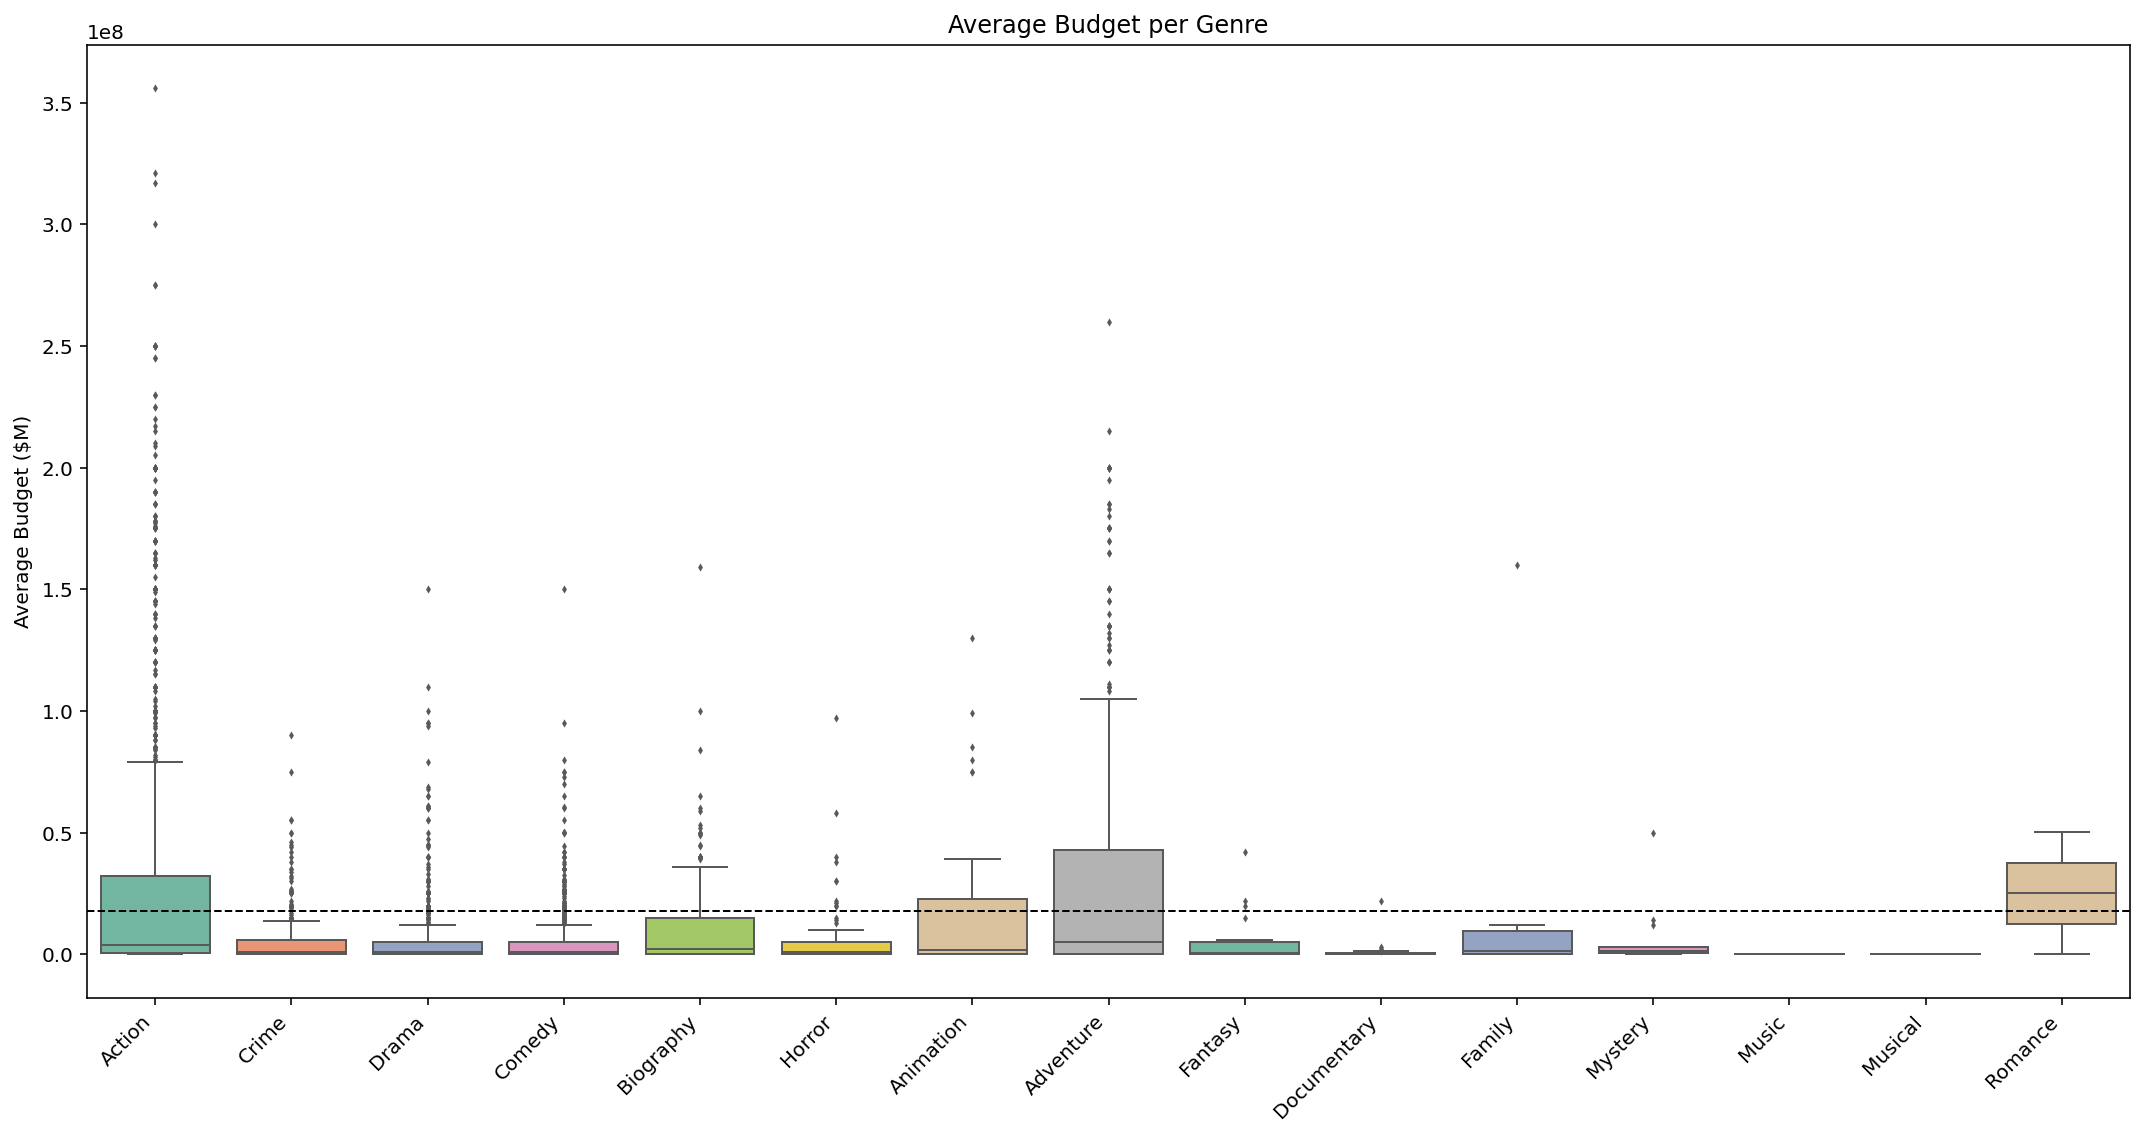

In [36]:
fig = plt.figure(figsize = (15, 8))

# fliersize is the size of outlier markers
g = sns.boxplot(x = 'genres', y = 'budget', data = imdb_info_withbudget, 
                palette="Set2", linewidth = 1, fliersize= 1.5)

g.set(title = 'Average Budget per Genre', 
      ylabel = "Average Budget ($M)", xlabel = "")

# put a horizontal line on overall mean
plt.axhline(imdb_info_withbudget.budget.mean(), ls='--', lw = 1, color = 'black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#fig.savefig("filename.png")
plt.show()